<a href="https://colab.research.google.com/github/konkasivaji/690-stats-and-visulaization/blob/main/Assignment_05/part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

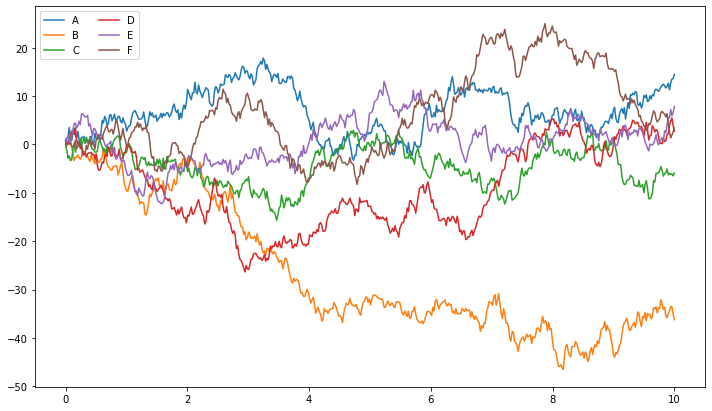

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [4]:
import requests
import pandas as pd

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-23 19:31:51.009183')

In [7]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-23 20:00:00,18633,18827,18623,18815,172.928481,3.239121e+06
2022-09-23 21:00:00,18809,18951,18809,18850,88.103898,1.665611e+06
2022-09-23 22:00:00,18850,19030,18806,19011,104.564270,1.981600e+06
2022-09-23 23:00:00,19011,19336,18999,19336,264.473937,5.069532e+06
2022-09-24 00:00:00,19338,19400,19238,19294,83.379961,1.613597e+06


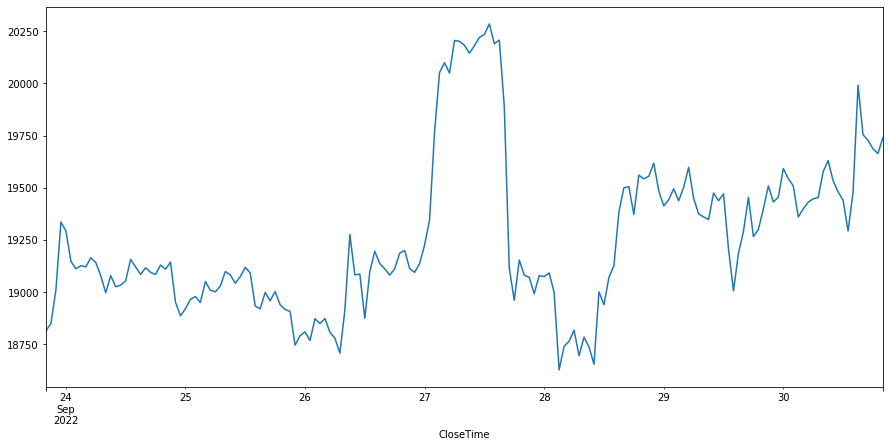

In [10]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [11]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-23 20:00:00,1282.8,1294.9,1275.0,1292.8,3754.997947,4.837273e+06
2022-09-23 21:00:00,1293.1,1308.2,1292.7,1300.5,593.120825,7.719641e+05
2022-09-23 22:00:00,1300.5,1328.1,1299.3,1325.9,1532.026970,2.020007e+06
2022-09-23 23:00:00,1327.9,1337.7,1324.6,1330.0,2652.406076,3.525525e+06
2022-09-24 00:00:00,1330.8,1339.3,1323.3,1327.2,1086.191080,1.446224e+06


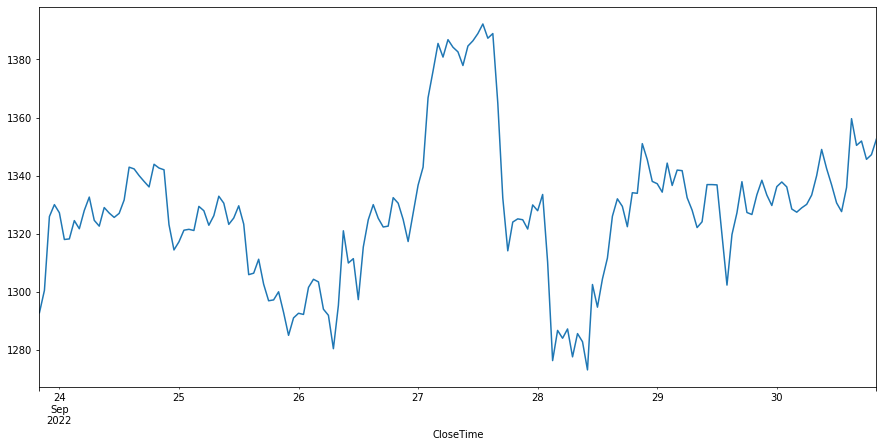

In [12]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-23 20:00:00,1282.8,1294.9,1275.0,1292.8,3754.997947,4.837273e+06
2022-09-23 21:00:00,1293.1,1308.2,1292.7,1300.5,593.120825,7.719641e+05
2022-09-23 22:00:00,1300.5,1328.1,1299.3,1325.9,1532.026970,2.020007e+06
2022-09-23 23:00:00,1327.9,1337.7,1324.6,1330.0,2652.406076,3.525525e+06
2022-09-24 00:00:00,1330.8,1339.3,1323.3,1327.2,1086.191080,1.446224e+06


In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [15]:
output_notebook()

In [16]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [17]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [18]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [19]:
eth.to_excel(writer, sheet_name='Ether')

In [20]:
writer.save()